# Library

In [819]:
import warnings
warnings.filterwarnings("ignore")
# ====================================
# 1) - EDA 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import math
# ====================================
# Data Preprocssing 
from sklearn.preprocessing import LabelEncoder , OneHotEncoder , StandardScaler , RobustScaler , MinMaxScaler , TargetEncoder , OrdinalEncoder,FunctionTransformer
from imblearn.combine import SMOTEENN , SMOTETomek
from imblearn.over_sampling import SMOTE
# Split Data 
from sklearn.model_selection import train_test_split
# ML Model 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC , LinearSVC
from sklearn.neighbors import KNeighborsClassifier
# Pipline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# Evalutaion Model
from sklearn.metrics import accuracy_score ,recall_score , precision_score , classification_report ,  f1_score
from sklearn.metrics import roc_curve ,roc_auc_score , confusion_matrix,ConfusionMatrixDisplay

# ================================
# Data Preparation

### 1) - Data Exploration

In [820]:
data = pd.read_csv(r'WA_Fn-UseC_-Telco-Customer-Churn.csv')
df = data.copy()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [821]:
# Information of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [822]:
# convert datatype for 'TotalCharges'
df[df["TotalCharges"]==" "]
len(df[df["TotalCharges"]==" "])
df["TotalCharges"] = df["TotalCharges"].replace({" ": "0.0"})
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [823]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [824]:
# Shape Of Data
df.shape

(7043, 21)

In [825]:
# Describe of Data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


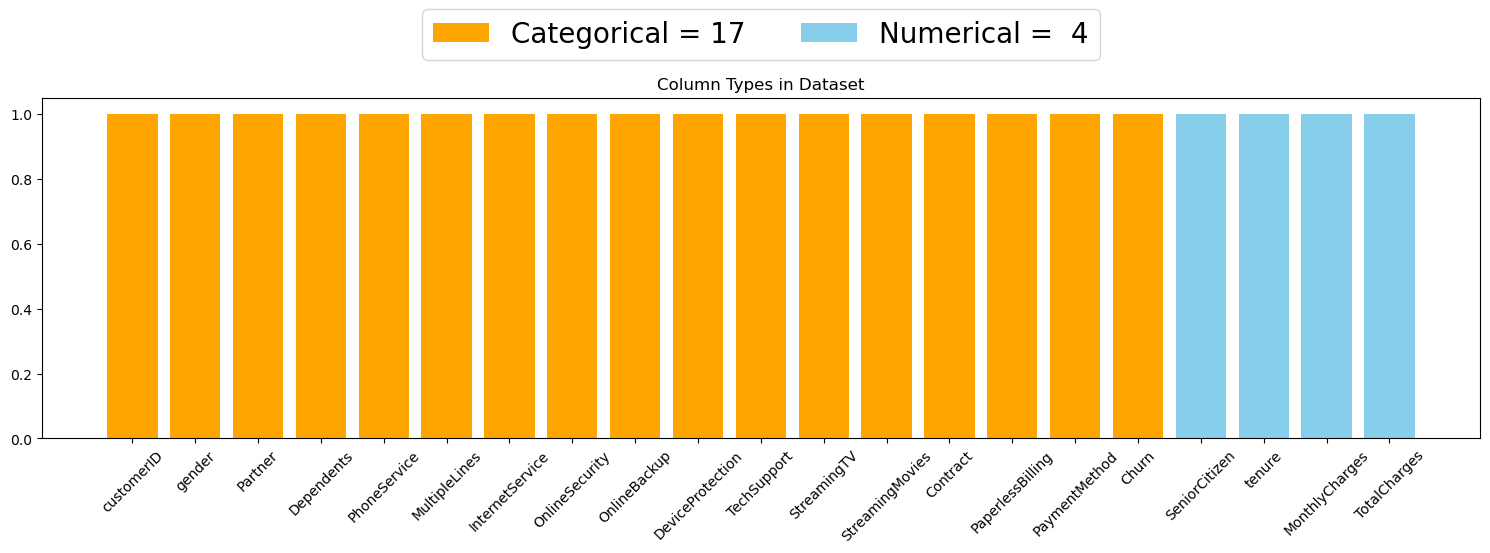

In [826]:
# Show Categorical & Numerical Columns 
cat_cols = df.select_dtypes(include="O").columns.tolist()
num_cols = df.select_dtypes(include=["number"]).columns.tolist()

types = ["Categorical"] * len(cat_cols) + ["Numerical"] * len(num_cols)
colors = ["orange" if t == "Categorical" else "skyblue" for t in types]
cols = cat_cols + num_cols

# =====================================
# Show Bar chart
plt.figure(figsize=(15, 6))
bars = plt.bar(cols, 1, color=colors)
plt.title("Column Types in Dataset")
plt.xticks(rotation=45)
# =====================================
# Show Box Legend
legend_elements = [
    Patch(facecolor='orange',  label=f'Categorical = {len(cat_cols)}'),
    Patch(facecolor='skyblue', label=f'Numerical =  {len(num_cols)}')
]
plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.3),
           ncol=2, fontsize=20, frameon=True)
plt.tight_layout()
plt.show()


In [827]:
for i in df.select_dtypes(include='object').columns:
    print(i , df[i].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


### ===========================================
### 2) - Data clean

In [828]:
# Drop Column [Customer ID]  
df.drop('customerID',axis = 1 , inplace = True)
cat_cols = df.select_dtypes(include="O").columns.tolist()

In [829]:
# Check Null (Missing Values)
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [830]:
# Drop Null 
df.dropna(inplace=True)
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [831]:
# Check Duplicated Values
print( f' Duplicated = {df.duplicated().sum()} \n====================================') 
df[df.duplicated()]

 Duplicated = 22 


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
964,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.70,Yes
1338,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
1491,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
1739,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.90,Yes
1932,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.20,No
2713,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No
2892,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,20.45,No
3301,Female,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.60,Yes
3754,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No
4098,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,20.20,Yes


In [832]:
df = df.drop_duplicates()
print( f' Duplicated = {df.duplicated().sum()} \n====================================') 
df[df.duplicated()]

 Duplicated = 0 


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


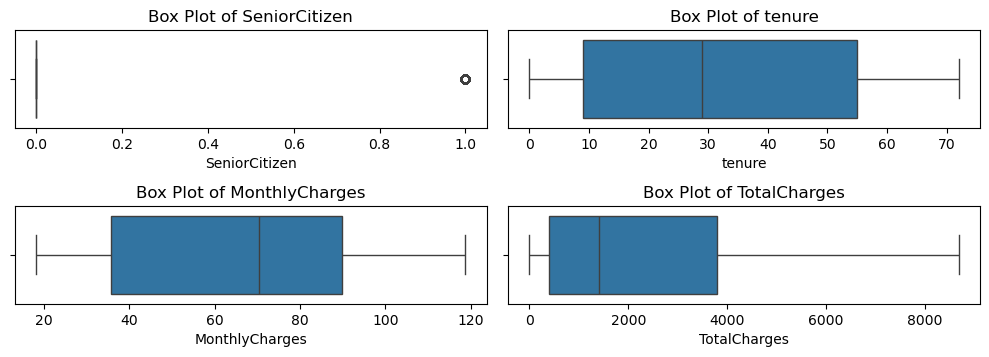

In [833]:
# Check Outlier
plt.figure(figsize=(10, 5))
for i, feature in enumerate(num_cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

In [834]:
df['MultipleLines'].replace('No phone service','No',inplace=True)
df['OnlineSecurity'].replace('No internet service','No',inplace=True)
df['OnlineBackup'].replace('No internet service','No',inplace=True)
df['DeviceProtection'].replace('No internet service','No',inplace=True)
df['TechSupport'].replace('No internet service','No',inplace=True)
df['StreamingTV'].replace('No internet service','No',inplace=True)
df['StreamingMovies'].replace('No internet service','No',inplace=True)

### ===========================================
### 3) - Data Preprocessing

In [835]:
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

In [836]:
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

In [837]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0


In [838]:
df['gender'].replace({'Female':1,'Male':0},inplace=True)

In [839]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0


In [840]:
df = pd.get_dummies(data=df, columns=['InternetService','Contract','PaymentMethod'], dtype=int)
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [841]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int32
InternetService_Fiber optic                  int32
InternetService_No             

### ===========================================
### 4) - EDA

In [842]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7021.0,0.495656,0.500017,0.00,0.00,0.00,1.0,1.00
SeniorCitizen,7021.0,0.162512,0.368947,0.00,0.00,0.00,0.0,1.00
Partner,7021.0,0.484546,0.499797,0.00,0.00,0.00,1.0,1.00
Dependents,7021.0,0.300527,0.458520,0.00,0.00,0.00,1.0,1.00
tenure,7021.0,32.469449,24.534965,0.00,9.00,29.00,55.0,72.00
PhoneService,7021.0,0.902863,0.296166,0.00,1.00,1.00,1.0,1.00
MultipleLines,7021.0,0.423159,0.494095,0.00,0.00,0.00,1.0,1.00
OnlineSecurity,7021.0,0.287566,0.452660,0.00,0.00,0.00,1.0,1.00
OnlineBackup,7021.0,0.345962,0.475715,0.00,0.00,0.00,1.0,1.00
DeviceProtection,7021.0,0.344965,0.475391,0.00,0.00,0.00,1.0,1.00


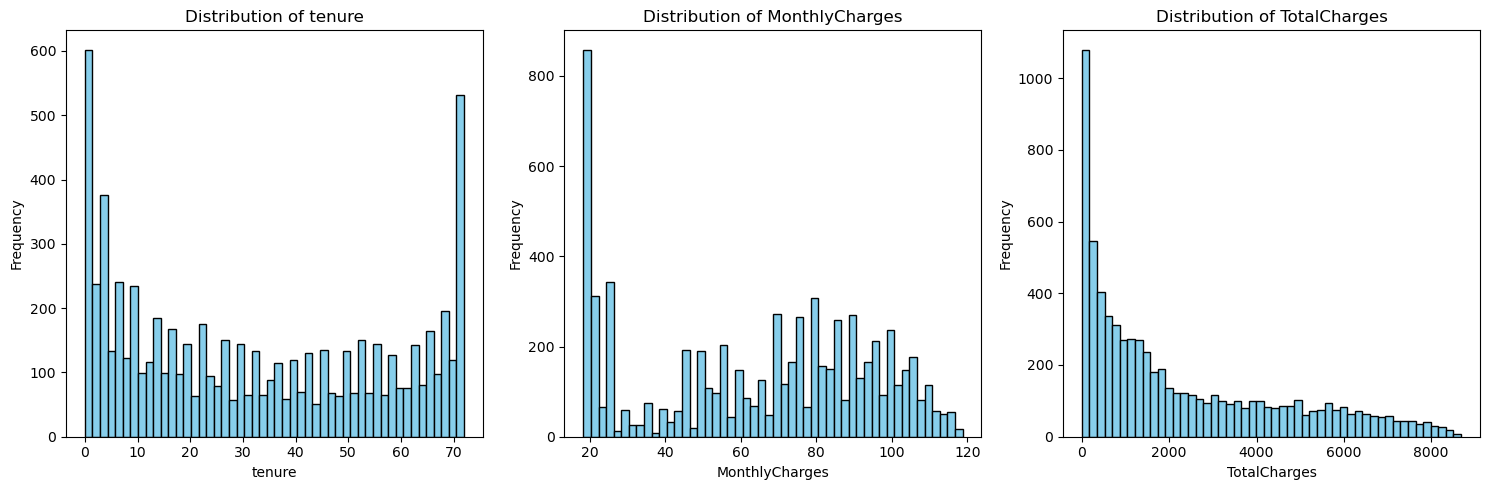

In [843]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

for i, column in enumerate(columns):
    axes[i].hist(df[column], bins=50, color='skyblue', edgecolor='black')

    axes[i].set_title(f'Distribution of {column}')

    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()

plt.show()

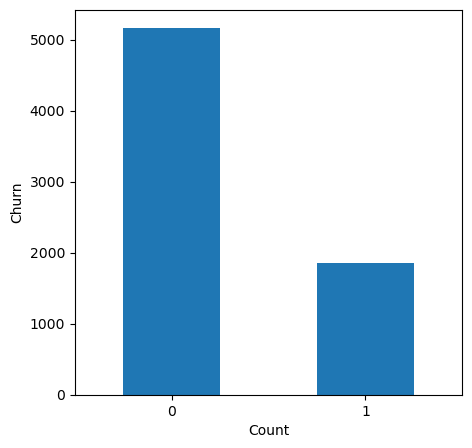

In [844]:
## Target values
df['Churn'].value_counts().plot(kind='bar', figsize=(5, 5))
plt.xlabel('Count')
plt.ylabel('Churn');
plt.xticks(rotation=0);


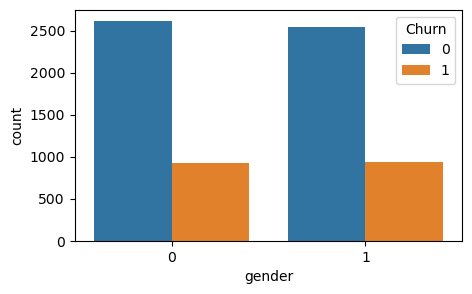

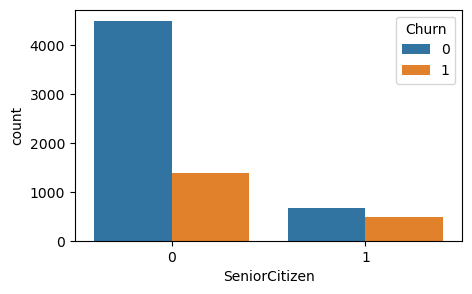

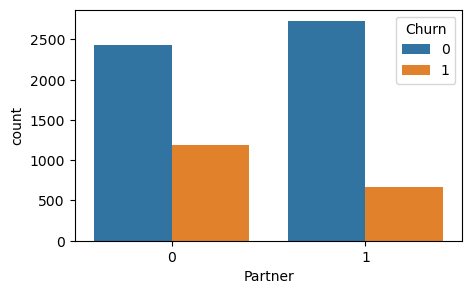

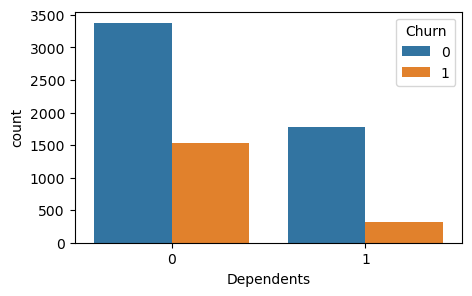

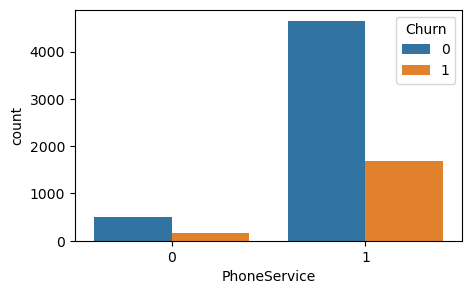

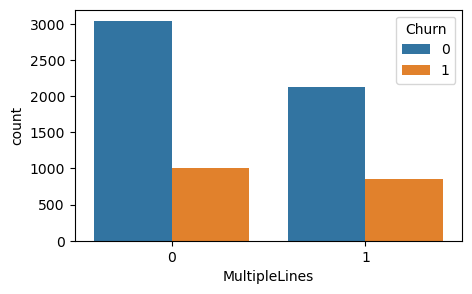

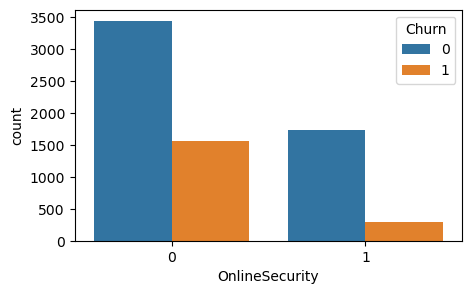

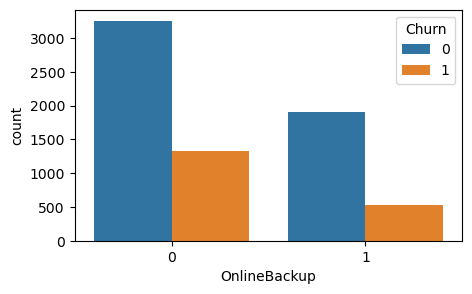

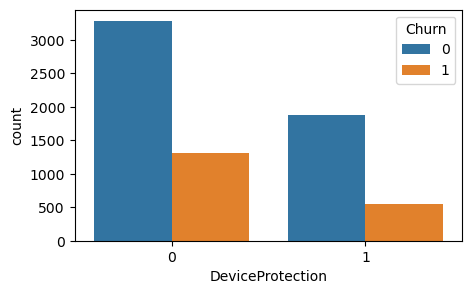

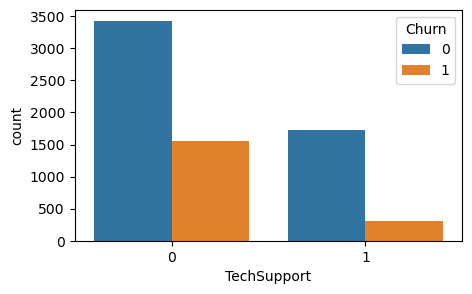

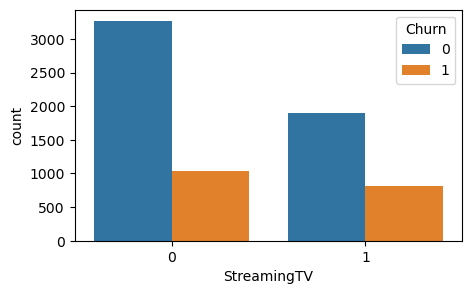

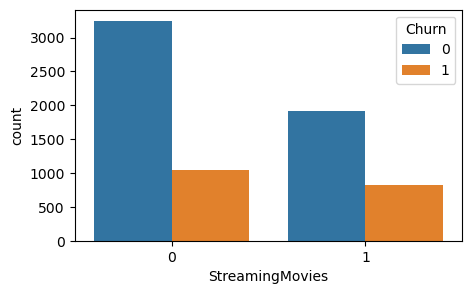

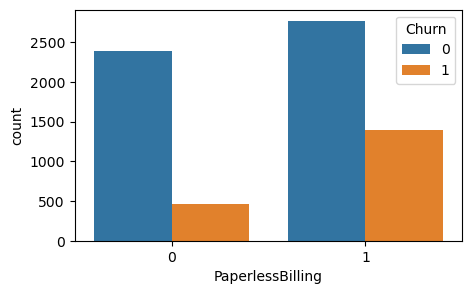

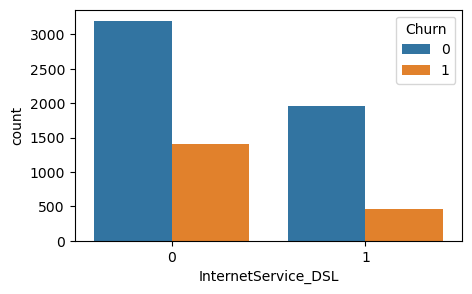

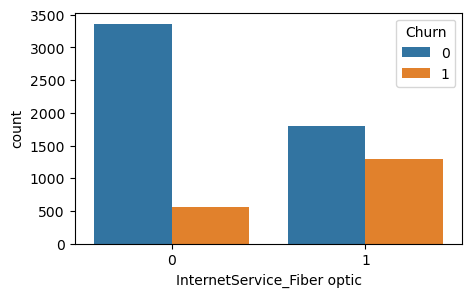

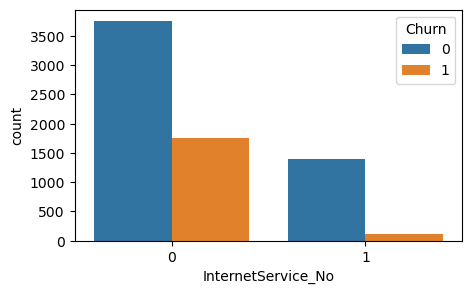

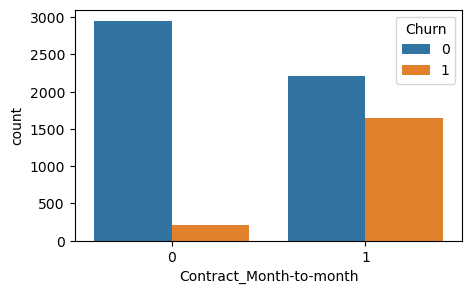

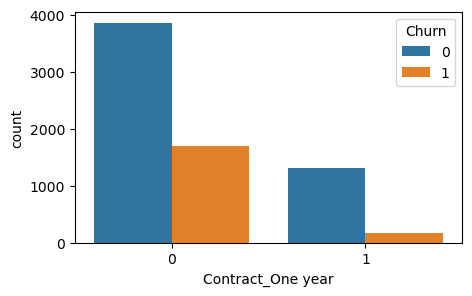

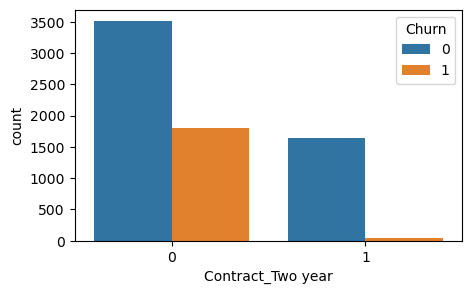

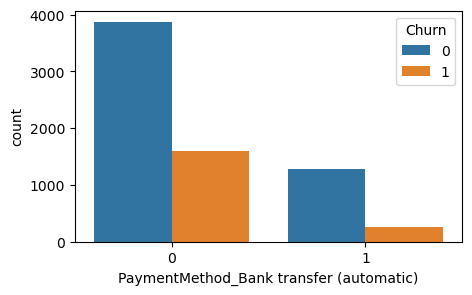

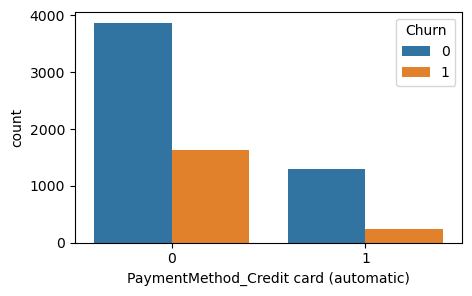

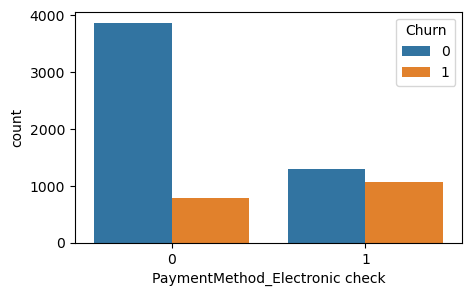

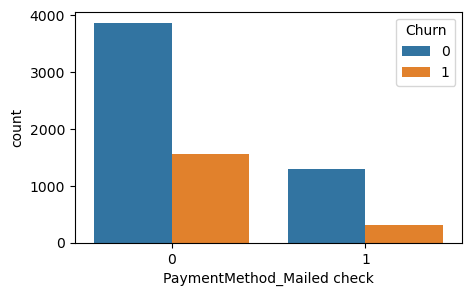

In [845]:
for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges', 'tenure'])):
    plt.figure(i, figsize=(5, 3))
    sns.countplot(data=df, x=predictor, hue='Churn')

<Axes: >

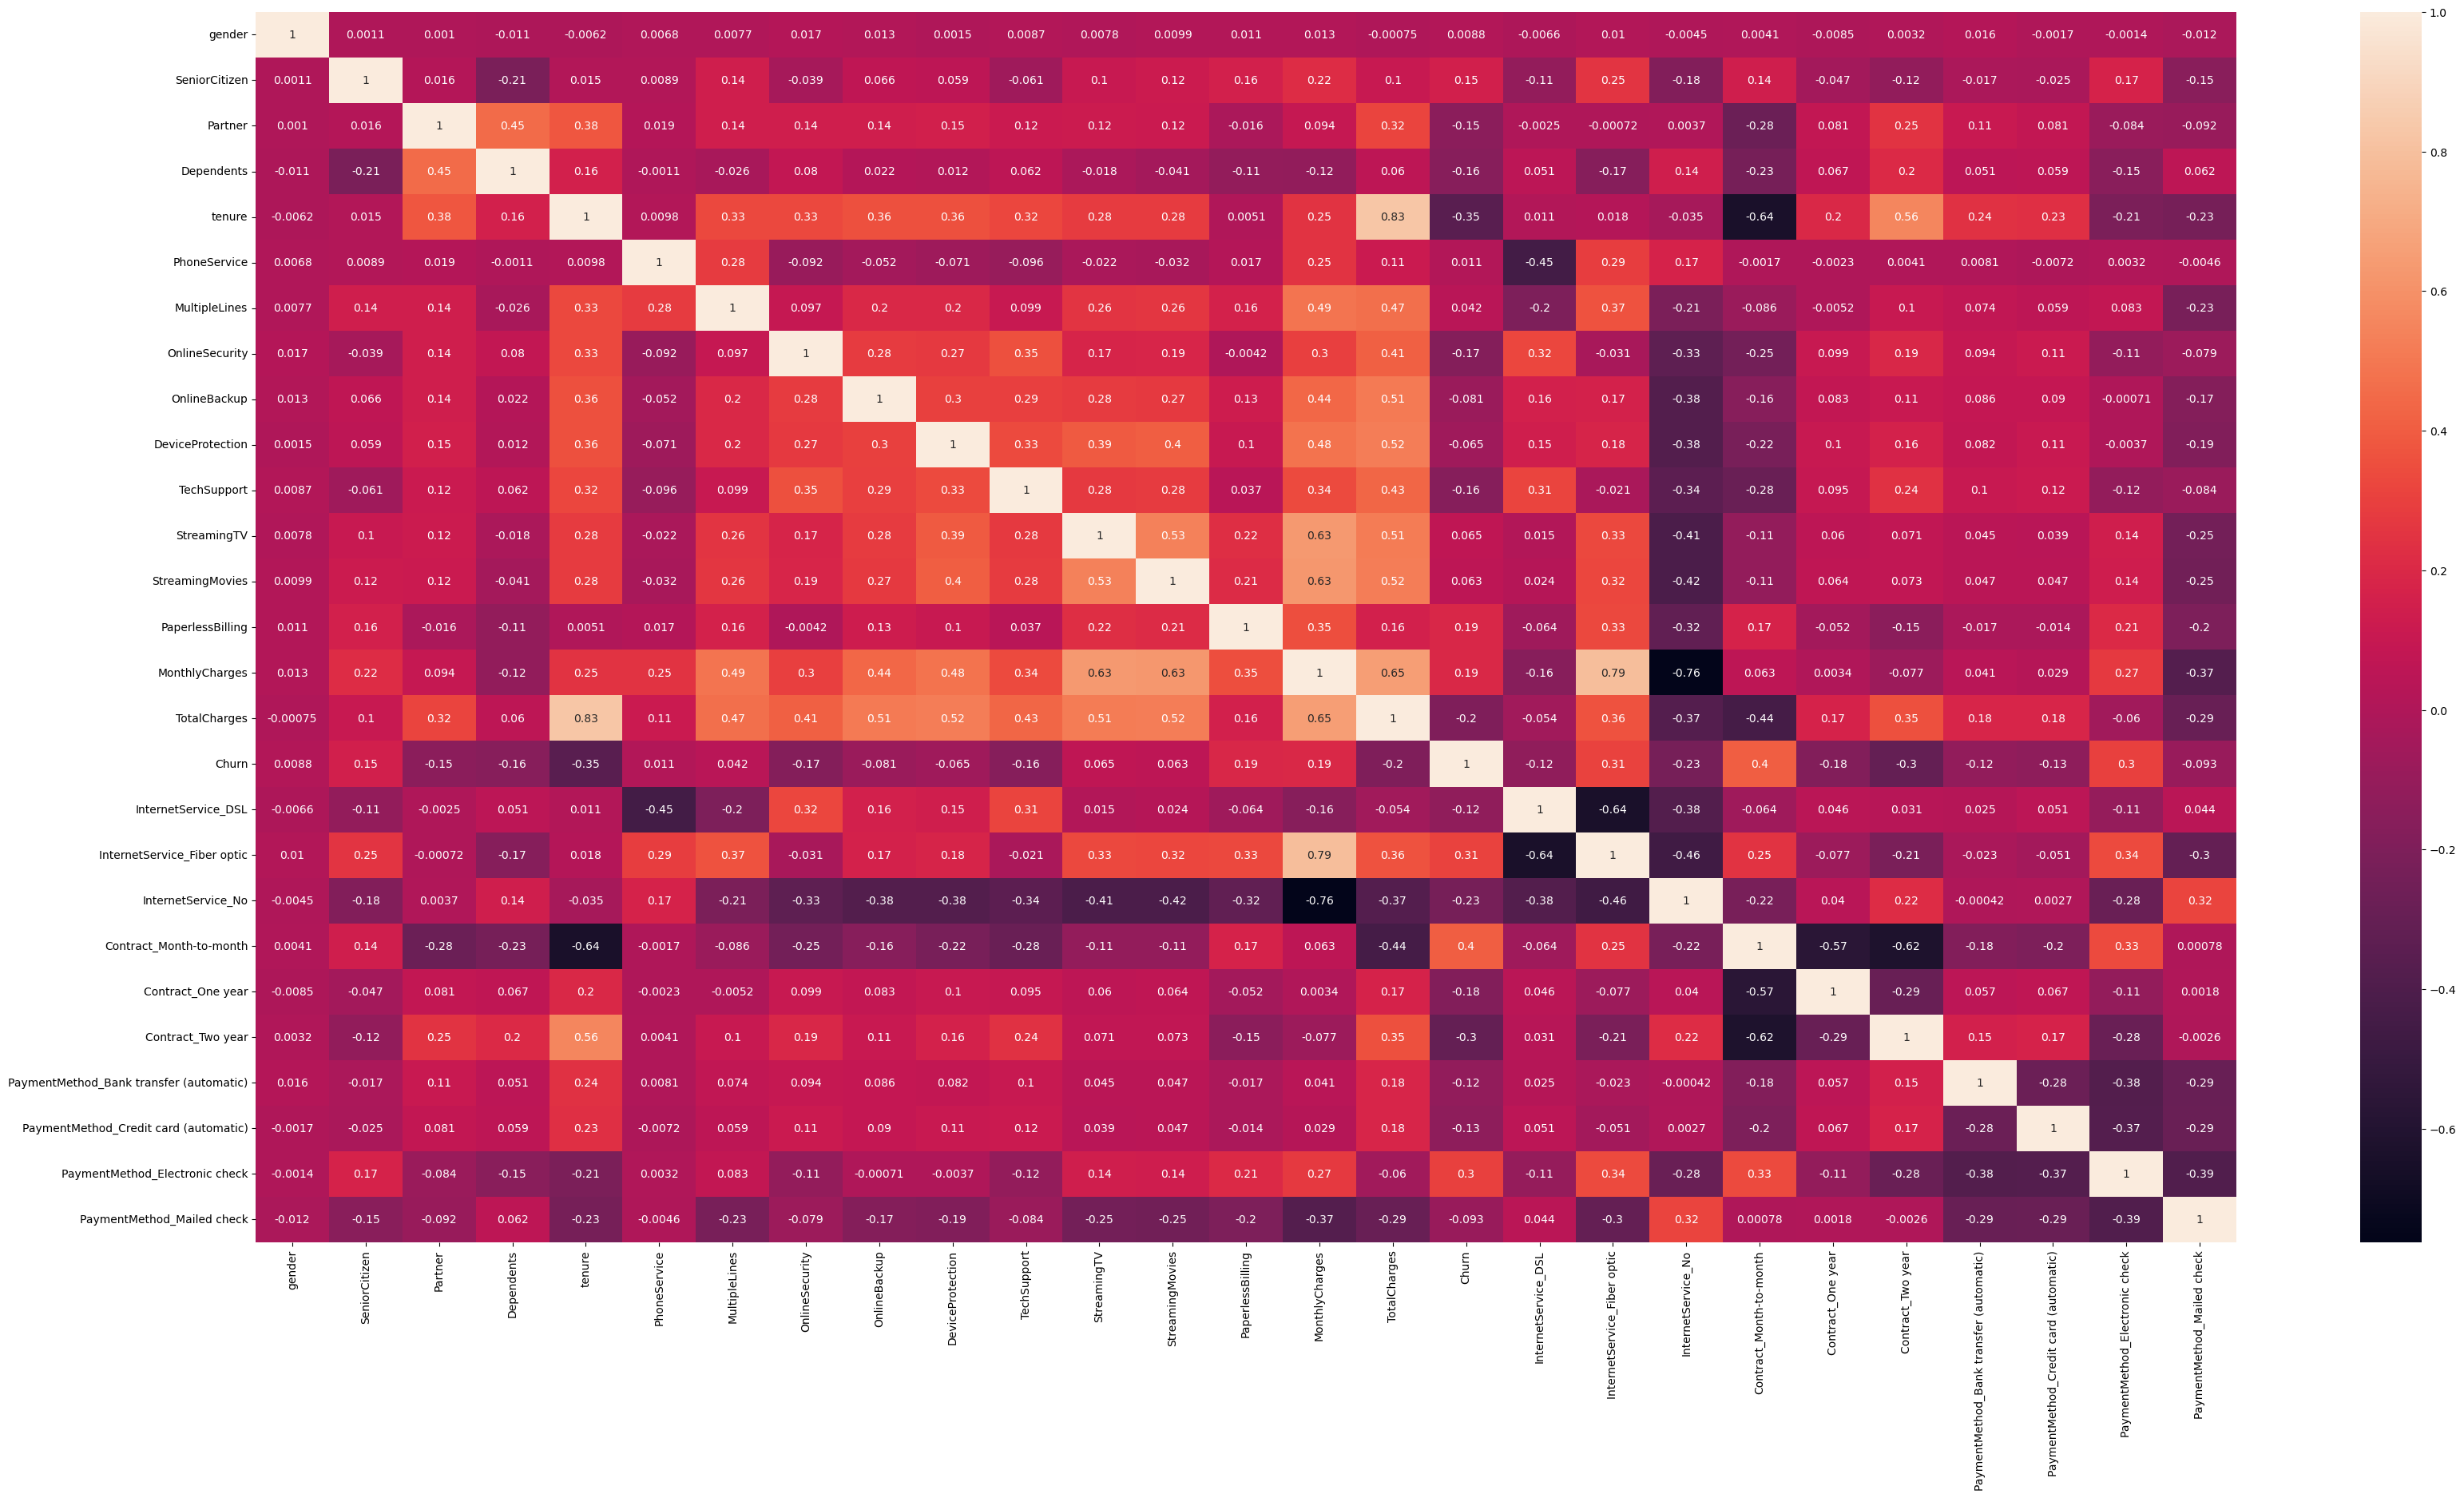

In [846]:
plt.figure(figsize=(40, 20))
sns.heatmap(df.corr(numeric_only=True),annot=True)

<Axes: >

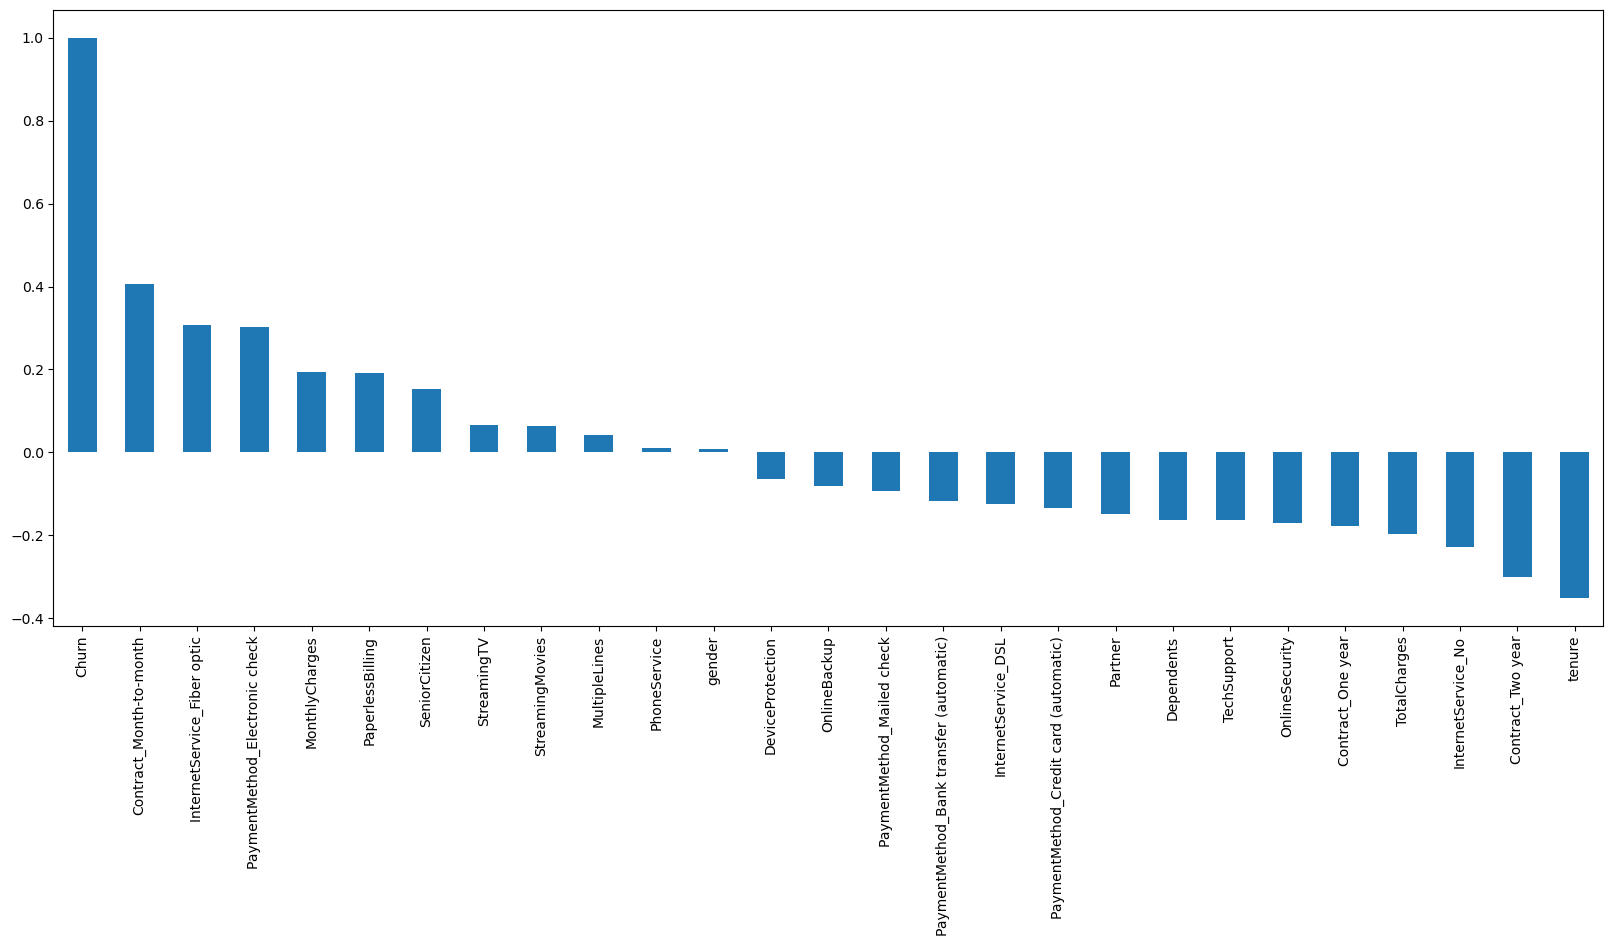

In [847]:
# Correlation
plt.figure(figsize=(20,8))
df.corr(numeric_only=True)['Churn'].sort_values(ascending = False).plot(kind='bar')

# =======================================
# ML Models & Evaluation Part 1

In [848]:
data.drop('customerID',axis = 1 , inplace = True)

data['MultipleLines'].replace('No phone service','No',inplace=True)
data['OnlineSecurity'].replace('No internet service','No',inplace=True)
data['OnlineBackup'].replace('No internet service','No',inplace=True)
data['DeviceProtection'].replace('No internet service','No',inplace=True)
data['TechSupport'].replace('No internet service','No',inplace=True)
data['StreamingTV'].replace('No internet service','No',inplace=True)
data['StreamingMovies'].replace('No internet service','No',inplace=True)
data['Churn'] = data['Churn'].replace({'Yes': 1, 'No': 0})
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')


In [849]:
data.dropna(inplace=True)
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [850]:

# -------------------------------
X = data.drop('Churn', axis=1)
y = data['Churn']
# Creat train and test spilt
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3
                                               ,random_state=42 ,stratify=y)

yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']
gender_column = ['gender']
onehot_columns = ['InternetService','Contract','PaymentMethod']
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']
def binary_transform(X):
    return X.replace({'Yes': 1, 'No': 0, 'Female': 1, 'Male': 0})
binary_transformer = FunctionTransformer(binary_transform)


In [851]:
from imblearn.pipeline import Pipeline 

In [852]:
# # Write Pipline Method 
preprocessor = ColumnTransformer(
    transformers=[
        ('binary', binary_transformer, yes_no_columns + gender_column),
        ('onehot', OneHotEncoder(handle_unknown='ignore', dtype=int), onehot_columns),
        ('scaler', StandardScaler(), cols_to_scale)
    ],
    remainder='passthrough'  
)

# Pipeline for Logistic Regression
pipe_logistic = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smoteenn', SMOTEENN()),
    ('classifier',LogisticRegression(class_weight='balanced',max_iter=100000))
])

# Pipeline for SVM
pipe_svc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smoteenn', SMOTEENN()),
    ('classifier', SVC(C=0.1,kernel='rbf',class_weight='balanced',probability=True))
])

# Pipeline for KNN
pipe_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smoteenn', SMOTEENN()),
    ('classifier', KNeighborsClassifier())
])

# Train both
pipe_logistic.fit(X_train, y_train)
pipe_svc.fit(X_train, y_train)
pipe_knn.fit(X_train, y_train)

# Predict
y_pred_log = pipe_logistic.predict(X_test)
y_pred_svc = pipe_svc.predict(X_test)
y_pred_knn = pipe_knn.predict(X_test)

Accuracy: 0.6890995260663507
Precision: 0.4539282250242483
Recall: 0.8342245989304813
F1 Score: 0.5879396984924623


Logistic Regression :
               precision    recall  f1-score   support

           0       0.91      0.64      0.75      1549
           1       0.45      0.83      0.59       561

    accuracy                           0.69      2110
   macro avg       0.68      0.74      0.67      2110
weighted avg       0.79      0.69      0.71      2110





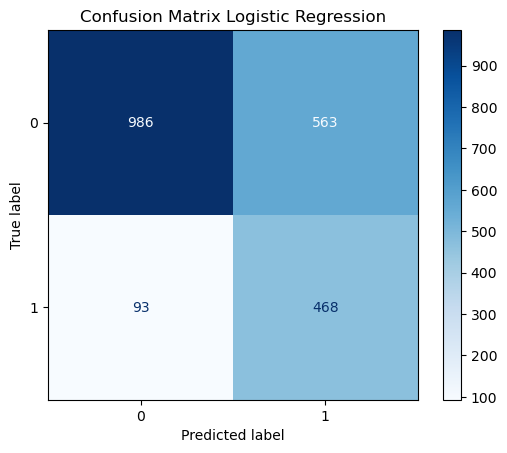

In [853]:
# Metrics Evaluation Logistic Regression
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1 Score:", f1_score(y_test, y_pred_log))
print('\n========================================\n')
print("Logistic Regression :\n", classification_report(y_test, y_pred_log))
print('\n========================================\n')
cm = confusion_matrix(y_test, y_pred_log)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix Logistic Regression")
plt.show()

Accuracy: 0.704265402843602
Precision: 0.46802030456852795
Recall: 0.82174688057041
F1 Score: 0.5963777490297543


SVM :
               precision    recall  f1-score   support

           0       0.91      0.66      0.77      1549
           1       0.47      0.82      0.60       561

    accuracy                           0.70      2110
   macro avg       0.69      0.74      0.68      2110
weighted avg       0.79      0.70      0.72      2110





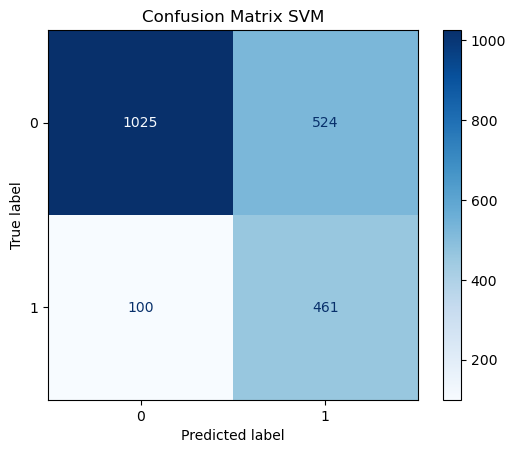

In [854]:
# Metrics Evaluation SVM
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Precision:", precision_score(y_test, y_pred_svc))
print("Recall:", recall_score(y_test, y_pred_svc))
print("F1 Score:", f1_score(y_test, y_pred_svc))
print('\n========================================\n')
print("SVM :\n", classification_report(y_test, y_pred_svc))
print('\n========================================\n')
cm = confusion_matrix(y_test, y_pred_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues') 
plt.title("Confusion Matrix SVM")
plt.show()

Accuracy: 0.6696682464454976
Precision: 0.4392857142857143
Recall: 0.8770053475935828
F1 Score: 0.5853658536585366


KNN :
               precision    recall  f1-score   support

           0       0.93      0.59      0.73      1549
           1       0.44      0.88      0.59       561

    accuracy                           0.67      2110
   macro avg       0.68      0.74      0.66      2110
weighted avg       0.80      0.67      0.69      2110





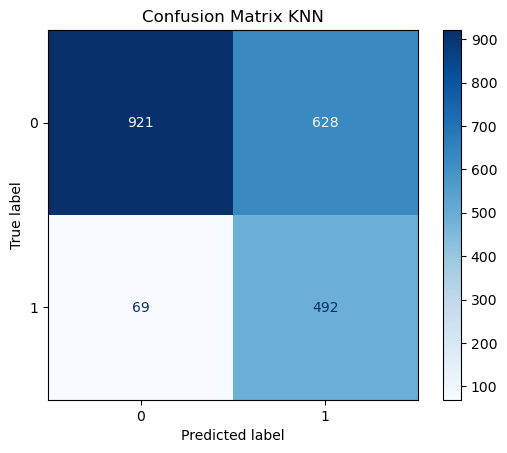

In [855]:
# Metrics Evaluation KNN
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn))
print('\n========================================\n')
print("KNN :\n", classification_report(y_test, y_pred_knn))
print('\n========================================\n')
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues') 
plt.title("Confusion Matrix KNN")
plt.show()

# =======================================
# AUC

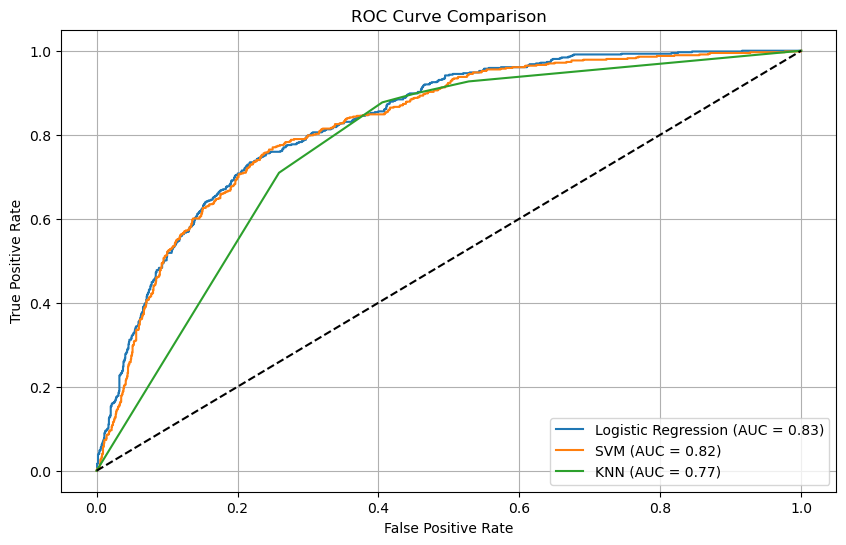

In [856]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# ---------------- Logsitic Regression ----------------
y_scores_logistic = pipe_logistic.decision_function(X_test)
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_scores_logistic)
auc_logistic = roc_auc_score(y_test, y_scores_logistic)

# ---------------- SVM ----------------
y_scores_svm = pipe_svc.decision_function(X_test)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_scores_svm)
auc_svm = roc_auc_score(y_test, y_scores_svm)

# ---------------- KNN ----------------
y_scores_knn = pipe_knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_scores_knn)
auc_knn = roc_auc_score(y_test, y_scores_knn)

# ---------------- Plot ----------------
plt.figure(figsize=(10, 6))
plt.plot(fpr_logistic, tpr_logistic, label='Logistic Regression (AUC = %0.2f)' % auc_logistic)
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = %0.2f)' % auc_svm)
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = %0.2f)' % auc_knn)

plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Save And Load Model 

In [857]:
import joblib
joblib.dump(pipe_svc, 'svc_pipeline.pkl')

['svc_pipeline.pkl']

In [858]:
# Load Model 
pipeline_model = joblib.load('svc_pipeline.pkl')  


In [859]:
new_user = pd.DataFrame([{
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 5,
    'PhoneService': 'Yes',
    'MultipleLines': 'No',
    'InternetService': 'Fiber optic',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'Yes',
    'StreamingMovies': 'Yes',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 70.35,
    'TotalCharges': 350.5
}])

pred = pipeline_model.predict(new_user)
proba = pipeline_model.predict_proba(new_user)

In [860]:
if pred[0] == 1:
    print("🔴 The customer is likely to **churn** (cancel the subscription).")
else:
    print("🟢 The customer is likely to **stay** (not churn).")

print(f"🧮 Churn probability = {proba[0][1]*100:.2f}%")


🔴 The customer is likely to **churn** (cancel the subscription).
🧮 Churn probability = 98.31%


In [ ]:
! streamlit run app.py